Not only causes the Moon tidal forces on Earth, but also vice versa. Compare the tidal effect of Jupiter (mass and radius are defined in `astropy.constants`) on its `moon Io` (`M = 8.9319×1022 kg`, `R = 1822 km`, `mean orbital radius r = 4.217 × 105 km`) to the Earth-Moon system. 

How large are the tidal bulges of Io and the Moon? Plot the ratio of the magnitude of the tidal acceleration atidal defined by Eq.(2.9) to the local gravity `g` at the surface as a function of `θ`.

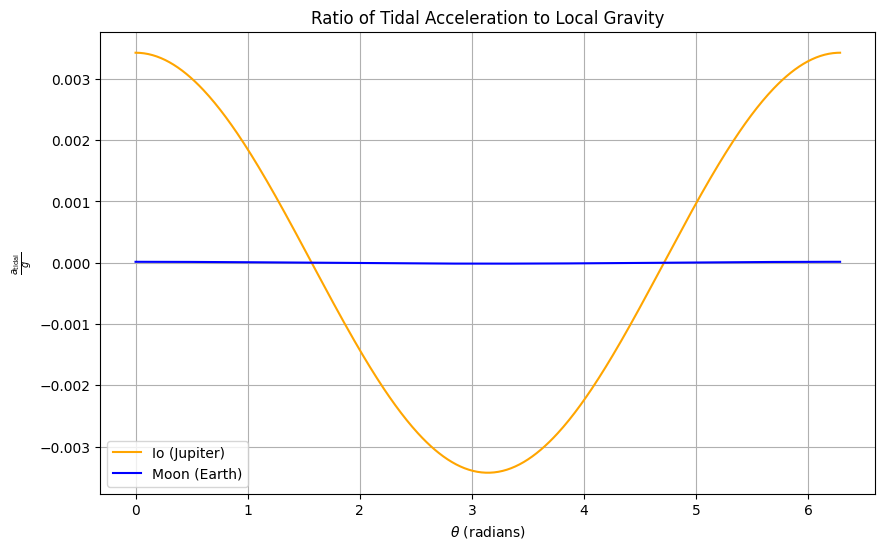

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import G, M_jup, M_earth, R_jup, R_earth, M_sun

# Constants
M_Io = 8.9319e22  # kg
R_Io = 1822e3  # m
r_Io = 4.217e8  # m (mean orbital radius)

M_Moon = 7.342e22  # kg
R_Moon = 1737.4e3  # m
r_Moon = 3.844e8  # m (mean orbital radius)

# Calculate the tidal acceleration 
def tidal_acceleration(M_planet, r_orbit, R_satellite, theta):
    return 2 * G.value * M_planet / r_orbit**3 * R_satellite * np.cos(theta)

# Calculate the local gravitational acceleration
def local_gravity(M_satellite, R_satellite):
    return G.value * M_satellite / R_satellite**2

# Calculate the ratio of tidal acceleration to local gravity
def tidal_gravity_ratio(M_planet, r_orbit, R_satellite, M_satellite, theta):
    a_tidal = tidal_acceleration(M_planet, r_orbit, R_satellite, theta)
    g_local = local_gravity(M_satellite, R_satellite)
    return a_tidal / g_local

# Define the angles for the plot
theta = np.linspace(0, 2 * np.pi, 500)

# Calculate the ratios for Io and the Moon
ratio_Io = tidal_gravity_ratio(M_jup.value, r_Io, R_Io, M_Io, theta)
ratio_Moon = tidal_gravity_ratio(M_earth.value, r_Moon, R_Moon, M_Moon, theta)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(theta, ratio_Io, label='Io (Jupiter)', color='orange')
plt.plot(theta, ratio_Moon, label='Moon (Earth)', color='blue')
plt.xlabel(r'$\theta$ (radians)')
plt.ylabel(r'$\frac{a_{\text{tidal}}}{g}$')
plt.title('Ratio of Tidal Acceleration to Local Gravity')
plt.legend()
plt.grid(True)
plt.show()


The tensile force experienced by a cylindrical rod of length `l` and mass `m` directed in radial direction toward a gravitating body of mass `M` is found by integrating Eq.(2.7) using `l<<r`.

(a) Estimate the tensile force acting on a rod of length `l = 1 m` at the `surface of Earth`, `the surface of a white dwarf` of `one solar mass`, and at the `event horizon of a black hole` with mass `M = 10M` , assuming that the formula based on Newtonian gravity can be used (the radius of the event horizon is given by the `Schwarzschild radius` `RS = 2GM/c2`, where c is the speed of light).

In [6]:
import numpy as np
from astropy.constants import G, M_sun, c
from astropy import units as u

l = 1 * u.m  # Length of the rod in meters

m_rod = 1 * u.kg  # Mass of the rod in kilograms (Assumed)

r_earth = 6.371e6 * u.m  # Radius of the Earth in meters
M_earth = 5.972e24 * u.kg  # Mass of the Earth in kilograms

# Gravitational force per unit length of the rod found using integration
F_tensile_earth = (G * M_earth * m_rod / r_earth**2) * l
print(f'Tensile Force at the surface of Earth: {F_tensile_earth:.2e} N')

# White dwarf with 1 solar mass
r_wd = 10e6 * u.m  # Approximate radius of a white dwarf in meters
M_wd = 1 * M_sun  # Mass of the white dwarf in kilograms

# Gravitational force per unit length of the rod
F_tensile_wd = (G * M_wd / r_wd**2) * l
print(f'Tensile Force at the surface of a white dwarf: {F_tensile_wd:.2e} N')

# Event horizon of a black hole with mass 10 solar masses
M_bh = 10 * M_sun 
R_S = (2 * G * M_bh / c**2).to(u.m)  # Schwarzschild radius in meters

# Gravitational force per unit length of the rod
F_tensile_bh = (G * M_bh / R_S**2) * l
print(f'Tensile Force at the event horizon of a black hole: {F_tensile_bh:.2e} N')


Tensile Force at the surface of Earth: 9.82e+00 m2 kg / s2 N
Tensile Force at the surface of a white dwarf: 1.33e+06 m2 / s2 N
Tensile Force at the event horizon of a black hole: 1.52e+12 m2 / s2 N


At which radial distance from the black hole is it going to be torn apart by tidal forces if the rod has a `diameter of 5 cm` and is made of steel with `density ρ = 7.8 gcm−3` and `yield strength σ = 5×108 Pa` (i.e. the maximum force the rod canresist is σ timesthecross section area). Also estimate how close a human being could approach the black whole until it would experience a tensile force comparable to the `weight of a 100 kg` mass on Earth (imagine such a weight being attached to your body).

In [7]:
import numpy as np

G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
M_sun = 1.989e30  # Mass of the Sun in kg
rho_steel = 7800  # Density of steel in kg/m^3
sigma_steel = 5e8  # Yield strength of steel in Pa
diameter_rod = 0.05  # Diameter of the rod in meters
human_mass = 70  # Average mass of a human in kg
L_human = 1.8  # Height of a human in meters
force_100kg = 100 * 9.8  # Force equivalent to 100 kg on Earth in Newtons

# Mass of the black hole (assuming it's a solar mass black hole)
M_bh = 10 * M_sun  

# Cross-sectional area of the rod
A_rod = np.pi * (diameter_rod / 2)**2

# Calculate the distance at which the rod will be torn apart by tidal forces
r_rod = ((2 * G * M_bh * rho_steel * diameter_rod**2) / sigma_steel)**(1/3)

# Calculate the distance at which a human experiences a force comparable to the weight of a 100 kg mass on Earth
r_human = ((2 * G * M_bh * human_mass * L_human) / force_100kg)**(1/3)

print(f"Radial distance from the black hole where the rod will be torn apart: {r_rod:.2e} meters")
print(f"Radial distance from the black hole where a human would experience a force comparable to a 100 kg weight: {r_human:.2e} meters")

Radial distance from the black hole where the rod will be torn apart: 4.70e+04 meters
Radial distance from the black hole where a human would experience a force comparable to a 100 kg weight: 6.99e+06 meters


Since any object falling toward a black hole and passing the event horizon will sooner or later experience extreme tidal forces,the radial stretching and compression in transversal directions would result in “spaghettification”. Solid bodies, however will be torn into ever smaller pieces due their limited deformability. Produce a plot similar to Fig.2.12, showing the tidal acceleration field acting on the rod at the critical distance determined in (b). Use the function `Rectangle()` from `matplotlib.patches` to show the cross section of the rod along its axis.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
M_sun = 1.989e30  # Mass of the Sun in kg
rho_steel = 7800  # Density of steel in kg/m^3
sigma_steel = 5e8  # Yield strength of steel in Pa
diameter_rod = 0.05  # Diameter of the rod in meters
human_mass = 70  # Average mass of a human in kg
L_human = 1.8  # Height of a human in meters
force_100kg = 100 * 9.8  # Force equivalent to 100 kg on Earth in Newtons

# Mass of the black hole (assuming it's a solar mass black hole)
M_bh = 10 * M_sun  

# Cross-sectional area of the rod
A_rod = np.pi * (diameter_rod / 2)**2

# Calculate the distance at which the rod will be torn apart by tidal forces
r_rod = ((2 * G * M_bh * rho_steel * diameter_rod**2) / sigma_steel)**(1/3)


L_rod = diameter_rod  # Assuming the rod's length is equal to its diameter for simplicity
delta_r = np.linspace(-L_rod / 2, L_rod / 2, 100)  
a_tidal = 2 * G * M_bh / r_rod**3 * delta_r  # Tidal acceleration field

# Plotting the rod and the tidal forces
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the rod's cross-section using Rectangle
rod_height = 0.02  # Height of the rectangle to represent the rod's thickness
rod_rect = Rectangle((-L_rod/2, -rod_height/2), L_rod, rod_height, color='lightblue', alpha=0.7)
ax.add_patch(rod_rect)

# Plotting tidal forces as arrows
ax.quiver(delta_r, np.zeros_like(delta_r), a_tidal, np.zeros_like(a_tidal), angles='xy', scale_units='xy', scale=1, color='red')

ax.set_xlabel('Position along the rod (m)')
ax.set_ylabel('Transverse direction (arbitrary units)')
ax.set_title('Tidal Acceleration Field Acting on the Rod at Critical Distance')
ax.set_xlim([-L_rod, L_rod])
ax.set_ylim([-0.1, 0.1])
ax.axhline(0, color='black', lw=0.5)

ax.annotate('Compression', xy=(-L_rod/2, 0.05), xytext=(-L_rod, 0.1), arrowprops=dict(facecolor='blue', shrink=0.05))
ax.annotate('Stretching', xy=(L_rod/2, 0.05), xytext=(L_rod, 0.1), arrowprops=dict(facecolor='blue', shrink=0.05))

plt.grid(True)
plt.show()